## Question 1 : Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/X.npy -O X.npy
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/y.npy -O y.npy

--2021-05-28 04:38:56--  https://github.com/adigup390/datasets/raw/main/X.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adigup390/datasets/main/X.npy [following]
--2021-05-28 04:38:56--  https://raw.githubusercontent.com/adigup390/datasets/main/X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528 [application/octet-stream]
Saving to: ‘X.npy’

X.npy               100%[===================>]     528  --.-KB/s    in 0s      

2021-05-28 04:38:57 (32.3 MB/s) - ‘X.npy’ saved [528/528]

--2021-05-28 04:38:57--  https://github.com/adigup390/datasets/raw/main/y.npy
Resolving github.com (github

In [ ]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it

  path_X = "X.npy"
  path_y = "y.npy"

  # Write your code here ----------
  X = np.load(path_X)
  y = np.load(path_y)

  # -------------------------------

  return X, y

In [ ]:
def get_linear_model(X, y):
  # This shoudl return a proper linear model without bias of type y = XW

  # Write your code here ----------
  D = X.shape[1]
  out_shape=y.shape[1]
  # -------------------------------
  
  W = np.random.randn(D, out_shape)

  return W

In [ ]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y

  # Write your code here ----------
  tmp = np.sum((y-y_pred)**2)
  error = tmp/len(y)
  # -------------------------------

  return error

In [ ]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0

  # Write your code here ----------
  M = np.matmul(X.T,X)
  M_inv=np.linalg.inv(M)
  N= np.matmul(M_inv,X.T)
  
  W=np.matmul(N,y)
  
  # -------------------------------

  return W

In [ ]:
def train_by_GD(X, y, epochs=5, lr=0.01):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  
  # Write your code here ----------
  error_hist=np.zeros(epochs,)
  W = get_linear_model(X, y)
  for i in range(epochs):
      W = W - lr*np.matmul(X.T , np.matmul(X,W)-y)
      y_pred = np.matmul(X,W)
      error_hist[i] = MSE(y,y_pred)
      print(error_hist[i])
  
  # -------------------------------

  return W, error_hist

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`. Also plot y_pred and y on different plots.

5.490059820643823


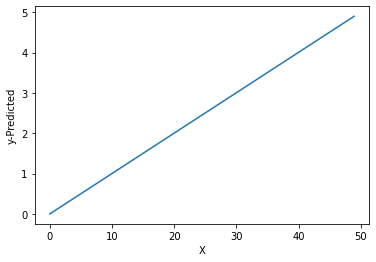

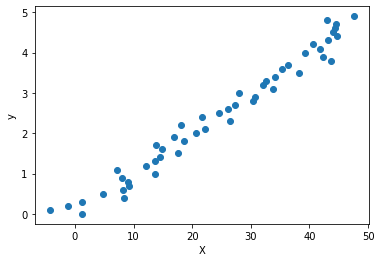

In [ ]:
# Write your code here ----------
X,y=load_data_LR()   
W = train_by_algebra(X, y)
y_pred = np.matmul(X,W)
print(MSE(y,y_pred))
plt.plot(y_pred,X)
plt.ylabel('y-Predicted')
plt.xlabel('X')
plt.show()
plt.scatter(y,X)
plt.ylabel('y')
plt.xlabel('X')
plt.show()
  
# -------------------------------

##### Learn **W** using gradient descent method for following learning rates, `lr = [0.01, 0.001, 0.0001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.  Also plot y_pred and y on different plots.

7636.942928361515
70648.37066991022
653932.948809302
6053285.277258638
56034043.65720054
518696240.20838666
4801470552.88214
44446282577.77999
411430626309.92975
3808533593021.844


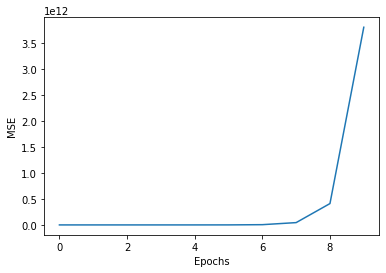

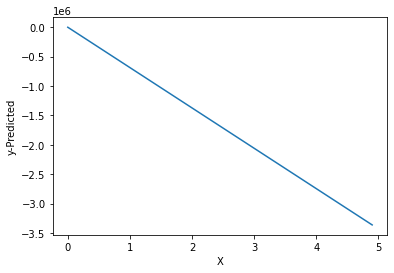

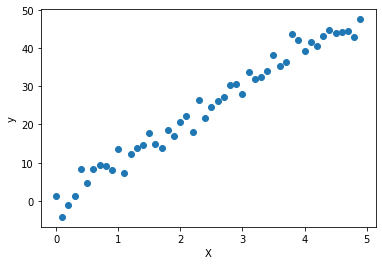

295.77171017656053
108.51626074426822
42.05591943919229
18.467943870106037
10.096145282828616
7.124842748591866
6.070273810039218
5.695988245595433
5.563147538241323
5.5159999717660755


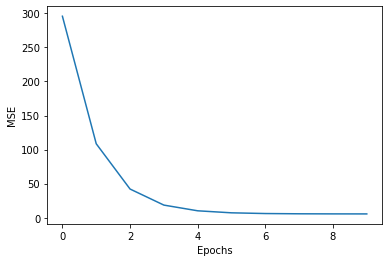

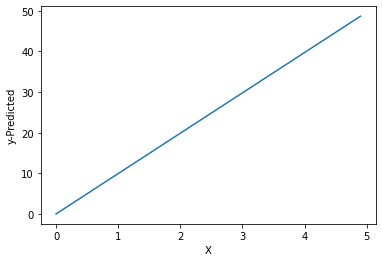

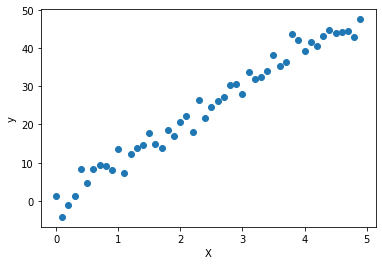

998.7142079858907
920.0351432659445
847.5887051254471
780.8811709430495
719.4579287393965
662.900378995575
610.8230818965526
562.8711305580644
518.7177323354848
478.0619817312976


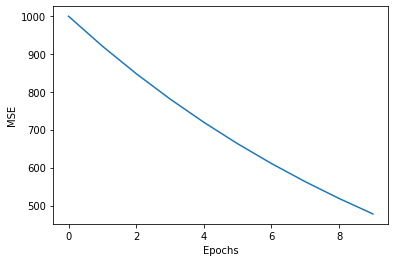

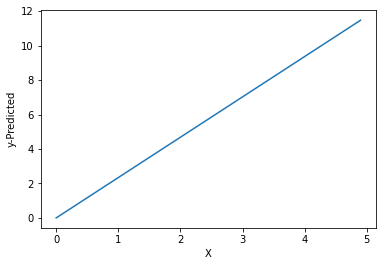

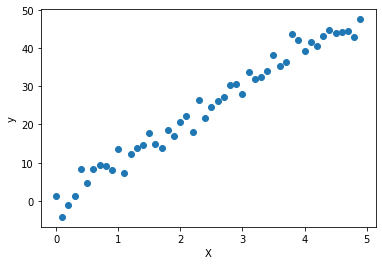

In [ ]:
# Write your code here ----------
X,y=load_data_LR()   
lr = [0.01, 0.001, 0.0001]
epochs = np.arange(10)
for i in lr:
  W , error = train_by_GD(X, y, 10 , i)
  plt.plot(epochs,error)
  plt.xlabel('Epochs')
  plt.ylabel('MSE')
  plt.show()
  y_pred=np.matmul(X,W)
  plt.plot(X,y_pred)
  plt.ylabel('y-Predicted')
  plt.xlabel('X')
  plt.show()
  plt.scatter(X,y)
  plt.ylabel('y')
  plt.xlabel('X')
  plt.show()
  
# -------------------------------

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [ ]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------
  cifar10_dataset = tf.keras.datasets.cifar10
  (x_train, y_train), (x_test, y_test) = cifar10_dataset.load_data()

  x_train = x_train/255.0
  x_test =  x_test/255.0

  # -------------------------------

  return x_train, y_train, x_test, y_test

### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [ ]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  model = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape = input_shape),
          tf.keras.layers.Dense(7200,activation=tf.nn.relu),
          tf.keras.layers.Dense(2304,activation=tf.nn.relu),
          tf.keras.layers.Dense(1024,activation=tf.nn.relu),
          tf.keras.layers.Dense(64,activation=tf.nn.relu),
          tf.keras.layers.Dense(num_class,activation=tf.nn.softmax)
  ])

  # -------------------------------

  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [ ]:
def build_cnn_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  model=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(num_class,activation='softmax')
        ])

  # -------------------------------

  return model

### Compile and train the fully connected neural network model using the above functions.

Epoch 1/10
98/98 [==============================] - 4s 35ms/step - loss: 2.8388 - accuracy: 0.1439 - val_loss: 2.1876 - val_accuracy: 0.1693
Epoch 2/10
98/98 [==============================] - 3s 32ms/step - loss: 2.1571 - accuracy: 0.1872 - val_loss: 2.1354 - val_accuracy: 0.2147
Epoch 3/10
98/98 [==============================] - 3s 32ms/step - loss: 1.9667 - accuracy: 0.2583 - val_loss: 1.8307 - val_accuracy: 0.3199
Epoch 4/10
98/98 [==============================] - 3s 33ms/step - loss: 1.7893 - accuracy: 0.3474 - val_loss: 1.7202 - val_accuracy: 0.3782
Epoch 5/10
98/98 [==============================] - 3s 33ms/step - loss: 1.6775 - accuracy: 0.3933 - val_loss: 1.6434 - val_accuracy: 0.3983
Epoch 6/10
98/98 [==============================] - 3s 33ms/step - loss: 1.6095 - accuracy: 0.4236 - val_loss: 1.5761 - val_accuracy: 0.4433
Epoch 7/10
98/98 [==============================] - 3s 33ms/step - loss: 1.5352 - accuracy: 0.4501 - val_loss: 1.5342 - val_accuracy: 0.4499
Epoch 8/10
98

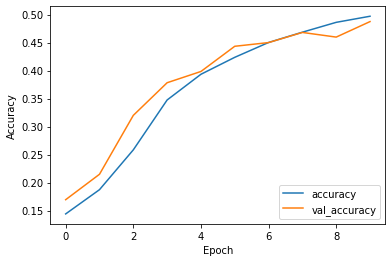

In [ ]:
# Write your code here ----------
x_train,y_train,x_test,y_test = load_data_cifar10_norm()
model = build_fc_model(input_shape=(32, 32, 3), num_class=10)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### Compile and train the CNN model using the above functions.

Epoch 1/10
98/98 [==============================] - 2s 18ms/step - loss: 1.9623 - accuracy: 0.2788 - val_loss: 1.7238 - val_accuracy: 0.3716
Epoch 2/10
98/98 [==============================] - 2s 16ms/step - loss: 1.5912 - accuracy: 0.4206 - val_loss: 1.5052 - val_accuracy: 0.4480
Epoch 3/10
98/98 [==============================] - 2s 16ms/step - loss: 1.4435 - accuracy: 0.4772 - val_loss: 1.3865 - val_accuracy: 0.4981
Epoch 4/10
98/98 [==============================] - 2s 16ms/step - loss: 1.3544 - accuracy: 0.5150 - val_loss: 1.3353 - val_accuracy: 0.5255
Epoch 5/10
98/98 [==============================] - 2s 16ms/step - loss: 1.2885 - accuracy: 0.5408 - val_loss: 1.2648 - val_accuracy: 0.5529
Epoch 6/10
98/98 [==============================] - 2s 16ms/step - loss: 1.2429 - accuracy: 0.5583 - val_loss: 1.2107 - val_accuracy: 0.5695
Epoch 7/10
98/98 [==============================] - 2s 16ms/step - loss: 1.1785 - accuracy: 0.5836 - val_loss: 1.1683 - val_accuracy: 0.5846
Epoch 8/10
98

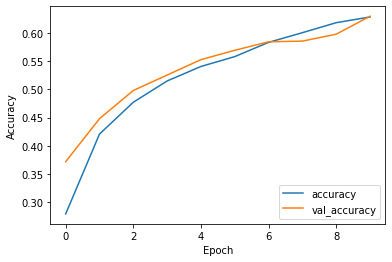

In [ ]:
# Write your code here ----------
x_train,y_train,x_test,y_test = load_data_cifar10_norm()
model = build_cnn_model(input_shape=(32, 32, 3), num_class=10)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [ ]:
print("Accuracy of cnn model is higher than fc model in each and every epoch epoch.")

Accuracy of cnn model is higher than fc model in each and every epoch epoch.
